In [1]:
import pandas as pd
import numpy  as np

from sklearn    import datasets        as ds
from sklearn    import model_selection as ms
from sklearn    import tree            as tr
from sklearn    import metrics         as mt
from matplotlib import pyplot          as plt

## Dados Sintéticos

In [2]:
n_samples = 20000
n_features = 2
n_informative = 2
n_redundant = 0
random_state = 0

X, y = ds.make_classification (n_samples = n_samples, #número de amostrar
                                n_features =n_features, #numero de colunas
                                n_informative = n_informative, #features informativas
                                n_redundant = n_redundant, #features auto - correlacionadas ou muito correlacionadas
                                random_state = random_state)


# dados de produção
X, X_prod, y, y_prod = ms.train_test_split(X, y, test_size = 0.2, random_state=random_state )

# Não há separação dos dados

In [3]:
#define o modelo
model = tr.DecisionTreeClassifier(max_depth=38)

#treinamento
model.fit (X, y)

#classificação sobre os dados de treinamento
yhat = model.predict(X)

acc = mt.accuracy_score(y, yhat)

print('Acurácia sobre o treinamento: {}'.format(acc))

Acurácia sobre o treinamento: 1.0


## Deploy do Modelo em Produção

In [4]:
yhat_prod = model.predict (X_prod)
acc_prod = mt.accuracy_score (y_prod, yhat_prod)

print('Acurácia sobre produção: {}'.format(acc_prod))

Acurácia sobre produção: 0.8515


# Estratégia Treino-Teste

In [5]:
# Separar os dados em Treinamento e teste
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.2, random_state=random_state )

In [6]:
# Modelo com os dados de treinamento
tr.DecisionTreeClassifier(max_depth=38)
model.fit(X_train, y_train)

# Classificação dados de teste
yhat_test = model.predict (X_test)
acc_test = mt.accuracy_score(y_test, yhat_test)

print('Acurácia sobre os dados teste: {}'.format(acc_test))

Acurácia sobre os dados teste: 0.8515625


## Escolha dos parâmetros do algoritmo

In [7]:
values = [i for i in range (1, 60)]

test_score = list()
for i in values:
    model = tr.DecisionTreeClassifier (max_depth = i)
    model.fit (X_train, y_train)
    
    #classificação sobre o teste
    yhat_test = model.predict(X_test)
    acc_test = mt.accuracy_score(y_test, yhat_test)
    test_score.append(acc_test)

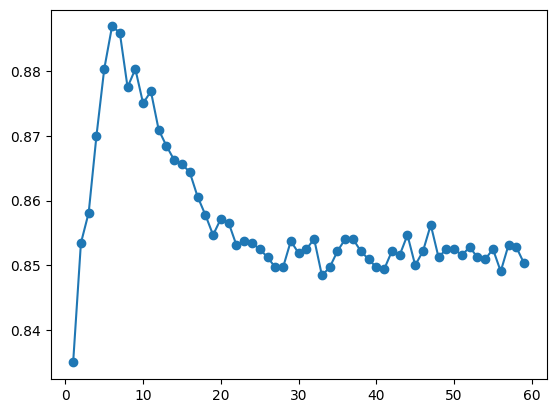

In [8]:
plt.plot(values, test_score, '-o', label='Test')

## Deploy do Modelo em Produção

In [9]:
# modelo treinado
model_last = tr.DecisionTreeClassifier (max_depth=6)
model_last.fit(np.concatenate((X_train, X_test)),
               np.concatenate((y_train, y_test)))

# Classificação dados de Produção
yhat_prod = model_last.predict(X_prod)
acc_prod = mt.accuracy_score (y_prod, yhat_prod)

print('Acurácia sobre os dados de produção: {}'.format(acc_prod))

Acurácia sobre os dados de Produção: 0.88175


# Estratégia Treino-Validação-Teste

In [10]:
# Separação entre treino e validação
X_train, X_val, y_train, y_val = ms.train_test_split (X_train, y_train, test_size=0.2)

## Escolha dos parâmetros do algoritmo (Validação)

In [11]:
values = [i for i in range (1, 60)]

val_score = list()
for i in values:
    model = tr.DecisionTreeClassifier (max_depth = i)
    model.fit (X_train, y_train)
    
    #classificação sobre o validação
    yhat_val = model.predict(X_val)
    acc_val = mt.accuracy_score(y_val, yhat_val)
    val_score.append(acc_val)

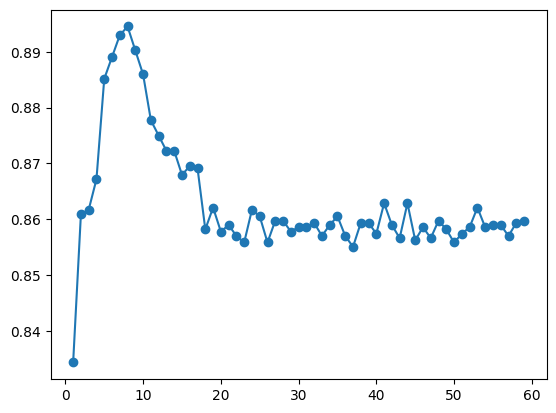

In [12]:
plt.plot(values, val_score, '-o', label='Validação')

In [13]:
#treinando o modelo
model = tr.DecisionTreeClassifier (max_depth = 8)
model.fit (X_train, y_train)

#classificação sobre o validação
yhat_val = model.predict(X_val)
acc_val = mt.accuracy_score(y_val, yhat_val)
val_score.append(acc_val)

print('Acurácio sobre os dados de validação: {}'.format(acc_val))

Acurácio sobre os dados de validação: 0.894140625


In [14]:
# Modelo treinado sobre o train + validation
model_last = tr.DecisionTreeClassifier (max_depth=8)
model_last.fit(np.concatenate((X_train, X_val)),
               np.concatenate((y_train, y_val )))

#classificação sobre os dados de teste
yhat_test = model_last.predict(X_test)
acc_test = mt.accuracy_score(y_test, yhat_test)

print('Acurácia sobre os dados de teste: {}'.format(acc_test))

Acurácia sobre os dados de teste: 0.8778125


In [16]:
#classificação sobre os dados de teste
yhat_prod = model_last.predict(X_prod)
acc_prod = mt.accuracy_score(y_prod, yhat_prod)

print('Acurácia sobre os dados de produção: {}'.format(acc_prod))

Acurácia sobre os dados de produção: 0.877
